In [1]:
# Import all required libraries

# data analysis and wrangling
import numpy as np
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']= (16,8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the training and testing data

data_train = pd.read_csv("train.csv", header=0)

data_test = pd.read_csv('test.csv', header=0)

combined_data = [data_train, data_test]

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
data_test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
data_train.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
data_train.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Check the missing values in the training and testing dataset

In [9]:
# Check the missing values in training dataset
data_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [10]:
data_test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [11]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [12]:
missing_percentage(data_train)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [13]:
missing_percentage(data_test)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Summary statistics of the training dataset
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Distribution of categorical features

In [20]:
#  distribution of categorical features
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pinsky, Mrs. (Rosa)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [21]:
data_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Andersson, Miss. Ida Augusta Margareta",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


# Analyze by pivoting features

In [22]:
# correlation (average survived ratio > 0.5) among the group of Pclass=1 and Survived

data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can see that there is a significant correlation (average survived ratio > 0.5) among Pclass=1 and Survived. So, we can include this feature in our predictive model.

In [23]:
# correlation between Sex and Survived

data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Looking at the above results, we can confirm that Sex = female had very high survival rate at 74%.

# Analyze by visualizing the Titanic data

# Correlations between a numeric feature (Age) and our predictive goal (Survived)

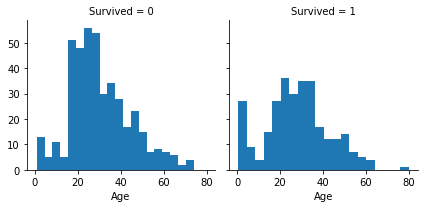

In [24]:
# correlations between a numeric feature (Age) and our predictive goal (Survived)

fig = sns.FacetGrid(data_train, col='Survived')
fig.map(plt.hist, 'Age', bins=20)

plt.savefig("corr_age_survived.png", dpi=300)

# Combine three features (age, Pclass, and survived) for identifying correlations

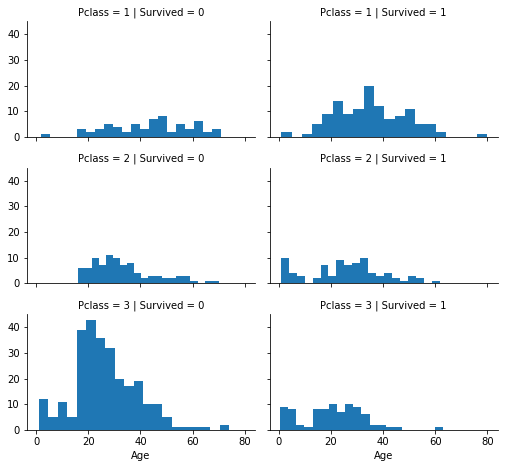

In [25]:
# combine three features (age, Pclass, and survived) for identifying correlations using a single plot

fig = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
fig.map(plt.hist, 'Age', bins=20)
fig.add_legend();

plt.savefig("three-features.png", dpi=300)

# Correlations among Embarked, Sex, Fare, and Survived

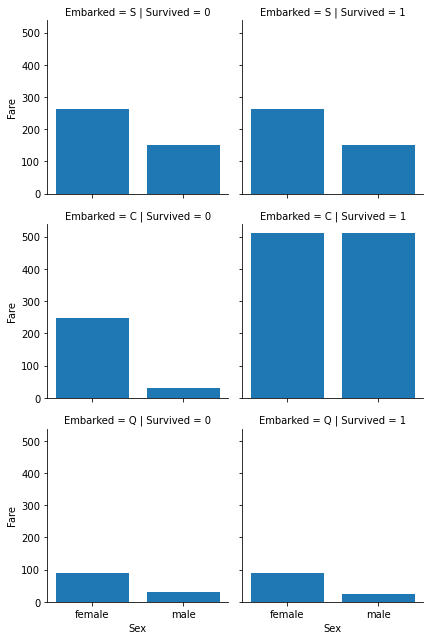

In [26]:
# correlations of Embarked, Sex, Fare, and Survived.

fig = sns.FacetGrid(data_train, row='Embarked', col='Survived')
fig.map(plt.bar, 'Sex', 'Fare')
fig.add_legend()

plt.savefig("corr-embarked-sex-fare-survived.png", dpi=300)

# Converting Sex feature to a new feature called Gender where female=1, and male=0

In [27]:
# converting Sex feature to a new feature called Gender where female=1, and male=0

for data in combined_data:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Missing values in the Cabin features of training and testing dataset

In [28]:
# Null values in the Cabin feature of the combine dataset of training and testing dataset

for dataset in combined_data:
    is_null = dataset["Cabin"].isnull().sum()
    print(is_null)

687
327


In [29]:
# Null values in the Cabin feature of the training dataset

print("The null values in the Cabin feature of the training dataset: ", data_train['Cabin'].isnull().sum())

The null values in the Cabin feature of the training dataset:  687


# Rate of duplication for the Ticket feature

In [30]:
rate_of_duplication = data_train['Ticket'].duplicated().sum()/891
print(f'Rate of duplication for the Ticket feature : {rate_of_duplication: 0.2f}')

Rate of duplication for the Ticket feature :  0.24


# Correlation between the Ticket feature and survival

In [31]:
data_train['Ticket_frequency'] = data_train.groupby('Ticket')['Ticket'].transform('count')

In [32]:
data_train[['Ticket_frequency', 'Survived']].groupby('Ticket_frequency').mean()

,Survived
Ticket_frequency,
1,0.297989
2,0.574468
3,0.698413
4,0.500000
5,0.000000
6,0.000000
7,0.238095


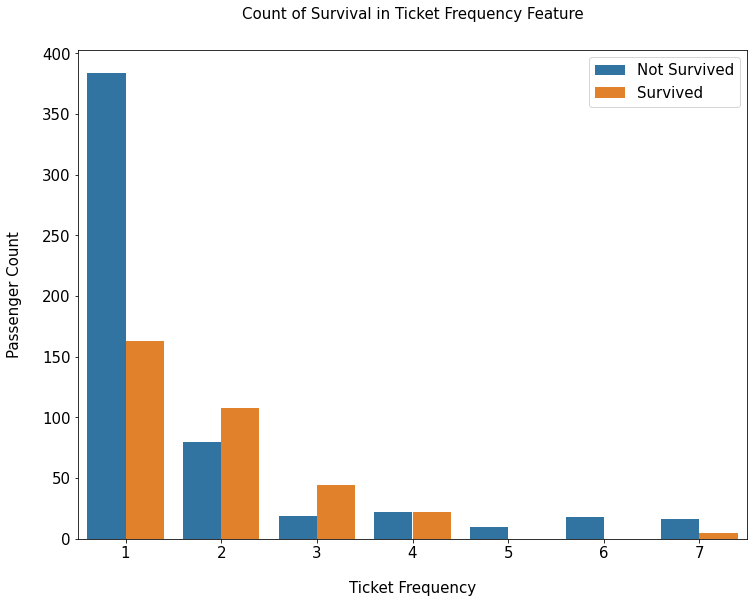

In [33]:
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_frequency', hue='Survived', data=data_train)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.savefig("ticket_freq-survived-corr2.png", dpi=300)

plt.show()

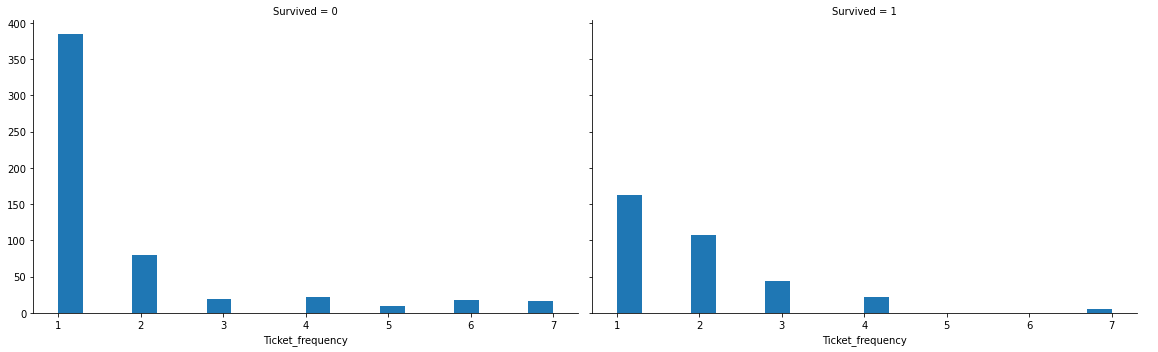

In [34]:
fig = sns.FacetGrid(data_train, col='Survived', size=5, aspect=1.6)
fig.map(plt.hist, 'Ticket_frequency', bins=20)

fig.add_legend()

plt.savefig("ticket_freq-survived-corr.png", dpi=300)

# Completing features with missing/null values

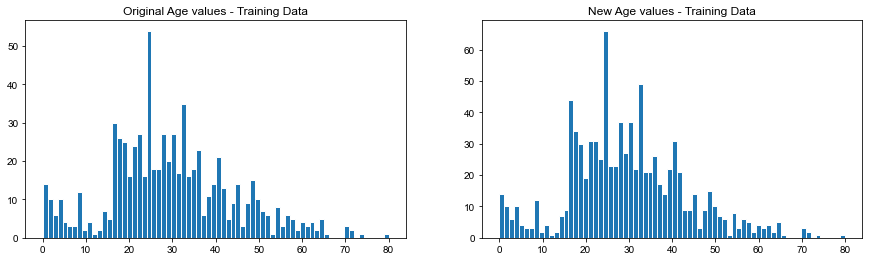

In [35]:
# Filling the misisng/null values for Age feature in the training dataset 

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(15,4))
axis1.set_title('Original Age values - Training Data')
axis2.set_title('New Age values - Training Data')
sns.set_style('whitegrid')

# get average, std, and number of null values in the training data
average_age_train   = data_train["Age"].mean()
std_age_train       = data_train["Age"].std()
count_null_age_train = data_train["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_null_age_train)

# plot original Age values
# NOTE: drop all null values, and convert to int
data_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1, grid=False)

# fill null values in Age column with random values generated
data_train["Age"][np.isnan(data_train["Age"])] = rand_1

# convert from float to int
data_train['Age'] = data_train['Age'].astype(int)
        
# plot new Age Values
data_train['Age'].hist(bins=70, ax=axis2, grid=False)

plt.savefig("missing_values_filled_age.png", dpi=300)

In [36]:
data_train['Age'].isnull().sum()

0

# Completing a categorical feature and fill the missing values in Embarked feature with the most common occurrences.

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. We simply fill these with the most common occurance.

In [37]:
port_freq = data_train['Embarked'].dropna().mode()[0]
port_freq

'S'

In [38]:
for data in combined_data:
    data['Embarked'] = data['Embarked'].fillna(port_freq)
    
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [39]:
data_train['Embarked'].isnull().sum()

0

# Completing and converting a numeric feature

Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.

In [40]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
data_test['Fare'].isnull().sum()

0

# Convert the Fare feature to ordinal values based on the FareBand

In [42]:
# FireBand

data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [43]:
# Convert the Fare feature to ordinal values based on the FareBand

train_df = [data_train]

for data in train_df:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

data_train = data_train.drop(['FareBand'], axis=1)
    
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_frequency
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,0,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,3,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,1,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,3,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,1,NaN,S,1
5,6,0,3,"Moran, Mr. James",0,23,0,0,330877,1,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,3,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,2,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,1,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,2,NaN,C,2


In [44]:
data_train[['Fare', 'Survived']].groupby(['Fare']).mean()

,Survived
Fare,
0,0.197309
1,0.308756
2,0.445415
3,0.581081
